# Simple thick lens
Creating and analyzing a simple thick lens in OpticStudio through ZOSPy. 

This example requires to connect to OpticStudio as extension. Also make sure ZOSPy is in sequential mode before running this example

In [1]:
import zospy as zp
import matplotlib.pyplot as plt

## Setup the connection

Initiate the connection to OpticStudio

In [2]:
zos = zp.ZOS()
zos.wakeup()
zos.connect_as_extension()

True

Get the primary system and make sure it is an new, empty system

In [3]:
oss = zos.get_primary_system()
oss.new()

## Set up the optical system
1. Alter some system settings regarding the aperture size

In [4]:
oss.SystemData.Aperture.ApertureValue = 10

2. Create an imput beam for viewing purposes

In [5]:
input_beam = oss.LDE.InsertNewSurfaceAt(1)  # behind the object surface
input_beam.Thickness = 10

3. Make a 10 mm thick lens with a radius of curvature of 30 mm and material type BK10

In [6]:
front_surface = oss.LDE.GetSurfaceAt(2)
front_surface.Radius = 30
front_surface.Thickness = 10
front_surface.SemiDiameter = 15
front_surface.Material = "BK10"

back_surface = oss.LDE.InsertNewSurfaceAt(3)
back_surface.Radius = -30
back_surface.Thickness = 29
back_surface.SemiDiameter = 15

4. Specify the detector surface

In [7]:
image_surface = oss.LDE.GetSurfaceAt(4)
image_surface.SemiDiameter = 5

## Render the model

In [8]:
draw3d = zp.analyses.systemviewers.viewer_3d(oss)

The ZOS-API unfortunately does not allow us to save the output of viewers. Hence, this output was manually saved to *3DLayout.jpeg*:

![](3DLayout.jpg)

## Analyze the model and show the results

1. Calculte the *FFT through focus MTF* and plot it

In [9]:
mtf = zp.analyses.mtf.fft_through_focus_mtf(oss, sampling="512x512", deltafocus=2.5, numberofsteps=51)

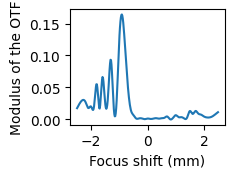

In [10]:
fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)
ax.plot(mtf.Data.index, mtf.Data[("Field: 0,0000 (deg)", "Tangential")])
ax.set_xlabel("Focus shift (mm)")
_ = ax.set_ylabel("Modulus of the OTF")

2. Calculate the Huygens PSF and plot it

In [11]:
huygens_psf = zp.analyses.psf.huygens_psf(oss, pupil_sampling="512x512", image_sampling="512x512", normalize=True)

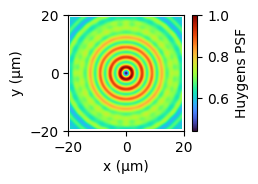

In [12]:
fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)
im = ax.imshow(
    huygens_psf.Data,
    cmap="turbo",
    extent=[
        huygens_psf.Data.columns.values.min(),
        huygens_psf.Data.columns.values.max(),
        huygens_psf.Data.index.values.min(),
        huygens_psf.Data.index.values.max(),
    ],
)
plt.colorbar(im, label="Huygens PSF")
ax.set_xlabel("x (μm)")
ax.set_ylabel("y (μm)")
ax.set_xticks([-20, 0, 20])
_ = ax.set_yticks([-20, 0, 20])